In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import pybedtools

In [44]:
open_dmr_dir = pathlib.Path(
    '/home/hanliu/project/mouse_rostral_brain/study/DMRAccessibility/SubType/OpenDMR/'
)
close_dmr_dir = pathlib.Path(
    '/home/hanliu/project/mouse_rostral_brain/study/DMRAccessibility/SubType/CloseDMR/'
)
hypo_peak_dir = pathlib.Path(
    '/home/hanliu/project/mouse_rostral_brain/study/DMRAccessibility/SubType/HypoPeak/'
)
hyper_peak_dir = pathlib.Path(
    '/home/hanliu/project/mouse_rostral_brain/study/DMRAccessibility/SubType/HyperPeak/'
)

peak_dir = pathlib.Path(
    '/home/hanliu/project/mouse_rostral_brain/study/mCClusterATACPeak/v2/SubType/'
)

In [54]:
def opener(path):
    return pd.read_csv(path, header=None, sep='\t', index_col=None)

def get_number(cluster):
    open_hypo = open_dmr_dir / f'{cluster}.HypoDMR.Open.bed'
    open_hypo = opener(open_hypo)
    
    #open_hyper = open_dmr_dir / f'{cluster}.HyperDMR.Open.bed'
    #open_hyper = opener(open_hyper)
    
    close_hypo = close_dmr_dir / f'{cluster}.HypoDMR.Close.bed'
    close_hypo = opener(close_hypo)
    
    #close_hyper = close_dmr_dir / f'{cluster}.HyperDMR.Close.bed'
    #close_hyper = opener(close_hyper)
    
    hypo_peak = hypo_peak_dir / f'{cluster}.bed'
    hypo_peak = opener(hypo_peak)
    
    #hyper_peak = hyper_peak_dir / f'{cluster}.bed'
    #hyper_peak = opener(hyper_peak)
    
    total_peak = peak_dir / f'{cluster}.sorted.peak.bed'
    total_peak = opener(total_peak)
    
    open_hypo_ratio = open_hypo.shape[0] / (open_hypo.shape[0] + close_hypo.shape[0])
    hypo_peak_ratio = hypo_peak.shape[0] / total_peak.shape[0]
    
    return open_hypo_ratio, hypo_peak_ratio

In [55]:
mc_clusters = [
    'CA1 Chrm3', 'CA1 Ptprg', 'CA1 Ak5', 'CA3 Efnb2', 'CA1 Kif26a',
    'Gfra1 Gfra1', 'CA1 Lingo2', 'CA3-St18 Epha5', 'CA3-St18 Nuak1',
    'CA3-St18 Tead1', 'CA3 Cadm2', 'IG-CA2 Peak1', 'IG-CA2 Chrm3',
    'IG-CA2 Xpr1', 'DG-po Bcl11a', 'DG-po Calb2', 'DG-po Kctd8', 'DG dg-all'
]

In [57]:
data = pd.DataFrame({cluster: get_number(cluster.replace(' ', '_')) for cluster in mc_clusters})
data = data.T
data.columns = ['dmr_overlap_peak', 'peak_overlap_dmr']
data.reset_index(inplace=True)

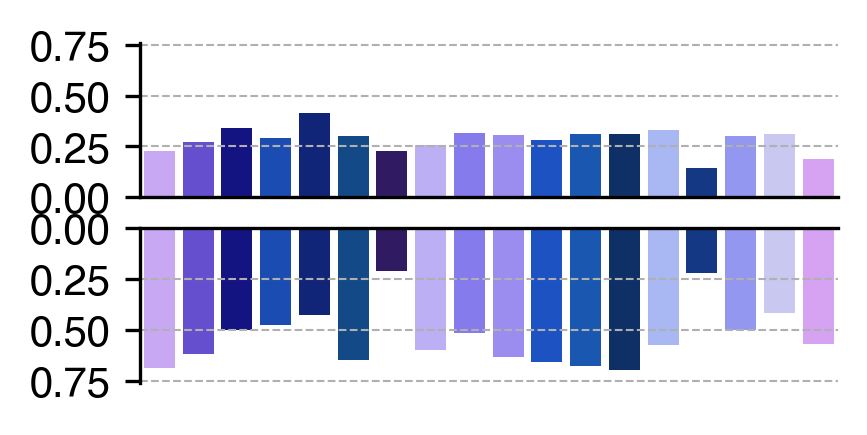

In [84]:
fig, (ax_dmr, ax_peak) = plt.subplots(figsize=(3, 1.5), nrows=2, dpi=300)

ax = ax_dmr
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

sns.barplot(ax=ax, data=data, x='index', y='dmr_overlap_peak', palette=sub_type_palette)
ax.set(xticks=[], ylim=(0, 0.76), yticks=(0, 0.25, 0.5, 0.75),
       xlabel='', ylabel='')
sns.despine(ax=ax)
ax.grid(axis='y', linestyle='--', linewidth=0.5)


ax = ax_peak
sns.barplot(ax=ax, data=data, x='index', y='peak_overlap_dmr', palette=sub_type_palette)
sns.despine(ax=ax, bottom=True, top=False)
ax.set(xticks=[], ylim=(0.76, 0), yticks=(0, 0.25, 0.5, 0.75),
       xlabel='', ylabel='')
ax.grid(axis='y', linestyle='--', linewidth=0.5)
pass
fig.savefig('DMR-peak-overlap.pdf')